In [3]:
import numpy as np
from matplotlib import pyplot as plt

## 1. Define neural n/w

In [54]:
class NeuralNetwork:

    def _sigmoid(self, x):
        num = np.exp(x - np.max(x))
        prob = num/ np.sum(num, axis=1, keepdims=True)
#         print (prob[2])
#         print (np.sum(prob[2]))
        return prob
    def __init__(self, hidden_dim=100, learning_rate=0.1, reg_rate=0.003, num_iterations=1000):
        self.hidden_dim = hidden_dim
        self.learning_rate = learning_rate
        self.reg_rate = reg_rate
        self.num_iterations = num_iterations
        self.k_class = None
        self.W_1, self.W_2 = None, None
        self.b_1, self.b_2 = None, None
        
    def fit(self, X_data, y, k_class=3):

        n_examples, n_dimension = X_data.shape
        self.k_class = k_class

        self.W1 = np.random.randn(n_dimension, self.hidden_dim)
        self.W2 = np.random.randn(self.hidden_dim, self.k_class )
        self.b_1 = np.zeros((1, self.hidden_dim))
        self.b_2 = np.zeros((1, self.k_class))

        
        for iteration in range(self.num_iterations):
            hidden_layer = np.dot(X_data, self.W1) + self.b_1
            final_layer = np.dot(hidden_layer, self.W2) + self.b_2
            prob =  self._sigmoid(final_layer)
            prob_label = prob[range(n_examples), y]
#             print (prob_label)
            loss = 1/n_examples * np.sum(np.log(prob_label))
            dw_loss =0.5 * (self.reg_rate * np.sum(self.W1 * self.W1) + self.reg_rate * np.sum(self.W2 * self.W2))
            loss = loss + dw_loss

            print (iteration, loss) if iteration % 10 == 0 else None
            
            # run backprop 
#             dLoss = ? 
 
nn = NeuralNetwork(num_iterations=1000)
nn.fit(X, y)

0 -1.9536663504192728
10 -1.9536663504192728
20 -1.9536663504192728
30 -1.9536663504192728
40 -1.9536663504192728
50 -1.9536663504192728
60 -1.9536663504192728
70 -1.9536663504192728
80 -1.9536663504192728
90 -1.9536663504192728
100 -1.9536663504192728
110 -1.9536663504192728
120 -1.9536663504192728
130 -1.9536663504192728
140 -1.9536663504192728
150 -1.9536663504192728
160 -1.9536663504192728
170 -1.9536663504192728
180 -1.9536663504192728
190 -1.9536663504192728
200 -1.9536663504192728
210 -1.9536663504192728
220 -1.9536663504192728
230 -1.9536663504192728
240 -1.9536663504192728
250 -1.9536663504192728
260 -1.9536663504192728
270 -1.9536663504192728
280 -1.9536663504192728
290 -1.9536663504192728
300 -1.9536663504192728
310 -1.9536663504192728
320 -1.9536663504192728
330 -1.9536663504192728
340 -1.9536663504192728
350 -1.9536663504192728
360 -1.9536663504192728
370 -1.9536663504192728
380 -1.9536663504192728
390 -1.9536663504192728
400 -1.9536663504192728
410 -1.9536663504192728
420

## 2. Generate data

In [7]:
N, D, K = 100, 2, 3

(300, 2)
(300,)


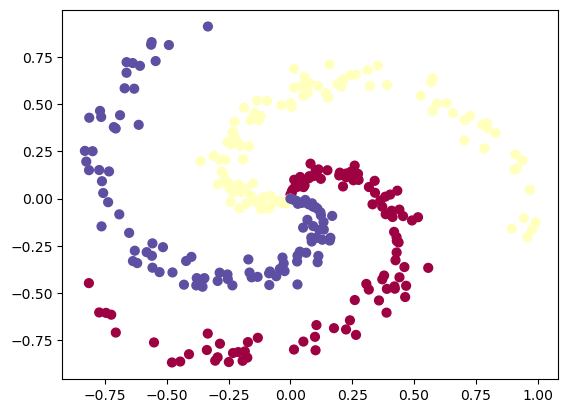

In [27]:
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels

print (X.shape)
print (y.shape)
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

TypeError: 'int' object is not iterable